In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('telco.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1454,8681-ICONS,Male,0,Yes,Yes,29,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.65,654.85,No
4769,2878-DHMIN,Male,0,Yes,Yes,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.90,666,No
4193,2428-ZMCTB,Male,0,No,No,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.75,208.25,No
4739,3088-LHEFH,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3,No
5409,6005-OBZPH,Female,1,No,No,26,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.15,2277.65,Yes


In [4]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df.iloc[488]['TotalCharges']

' '

In [8]:

df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [9]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df1.loc[:, 'TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')


In [11]:
df1.TotalCharges.dtypes


dtype('O')

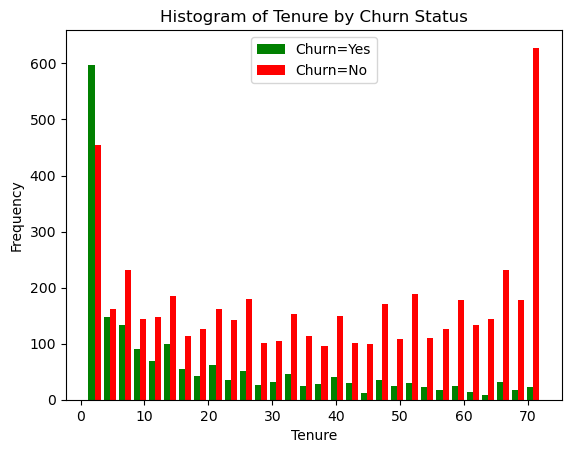

In [12]:

tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], bins=30, color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure by Churn Status')
plt.legend()
plt.show()


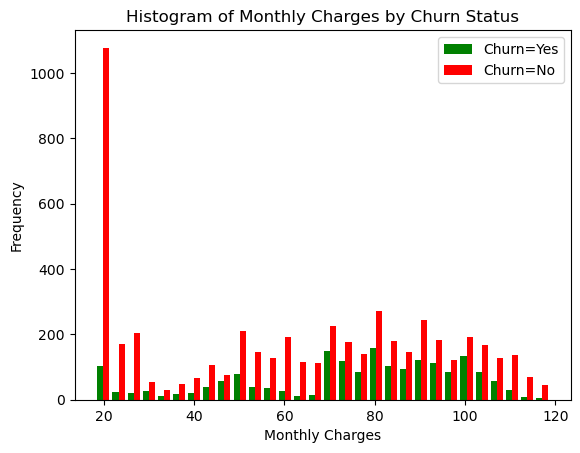

In [13]:
monthly_charges_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
monthly_charges_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], bins=30, color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Charges by Churn Status')
plt.legend()
plt.show()

In [14]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=="object":
            print(f"{column} :{df[column].unique()}")

In [15]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges :[29.85 1889.5 108.15 ... 346.45 306.6 6844.5]
Churn :['No' 'Yes']


In [16]:
df1 = df1.replace('No internet service', 'No')

C:\Users\Vishwesh PC\AppData\Local\Temp\ipykernel_16644\1144134976.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace('No internet service', 'No')


In [17]:

df1 = df1.replace('No phone service', 'No')

In [18]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes']
OnlineBackup :['Yes' 'No']
DeviceProtection :['No' 'Yes']
TechSupport :['No' 'Yes']
StreamingTV :['No' 'Yes']
StreamingMovies :['No' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [19]:
Yes_and_NO = [
    'Partner',
    'Dependents', 'PhoneService', 'MultipleLines', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'PaperlessBilling', 'Churn'
]


df1[Yes_and_NO] = df1[Yes_and_NO].replace({'Yes': 1, 'No': 0})
print(df1)


      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     Female              0        1           0       1             0   
1       Male              0        0           0      34             1   
2       Male              0        0           0       2             1   
3       Male              0        0           0      45             0   
4     Female              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038    Male              0        1           1      24             1   
7039  Female              0        1           1      72             1   
7040  Female              0        1           1      11             0   
7041    Male              1        1           0       4             1   
7042    Male              0        0           0      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0                 0             DSL       

C:\Users\Vishwesh PC\AppData\Local\Temp\ipykernel_16644\2063953491.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[Yes_and_NO] = df1[Yes_and_NO].replace({'Yes': 1, 'No': 0})


In [20]:
df1['gender'] = df1['gender'].replace({'Female': 1, 'Male': 0})

print(df1)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0                 0             DSL       

C:\Users\Vishwesh PC\AppData\Local\Temp\ipykernel_16644\895132807.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'] = df1['gender'].replace({'Female': 1, 'Male': 0})


In [21]:
df2=pd.get_dummies(data=df1,columns=['InternetService','PaymentMethod','Contract'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [22]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
176,1,1,0,0,15,1,1,0,0,0,...,False,True,False,False,False,False,True,True,False,False
5270,0,0,0,1,40,1,0,1,1,0,...,True,False,False,False,False,False,True,True,False,False
3388,1,0,1,0,65,1,0,1,0,1,...,True,False,False,False,False,False,True,True,False,False
1440,0,0,1,1,8,1,0,0,0,0,...,False,False,True,False,True,False,False,False,True,False


In [23]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [24]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()

df2[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
115,0,0,1,1,0.028169,1,0,1,1,0,...,False,True,False,False,False,True,False,True,False,False
3305,0,1,0,0,0.521127,1,1,0,0,0,...,False,True,False,False,False,True,False,True,False,False
5565,1,0,1,0,0.239437,0,0,0,0,1,...,True,False,False,False,False,True,False,True,False,False
4298,0,0,0,0,0.126761,1,0,0,0,0,...,True,False,False,False,False,False,True,True,False,False


In [25]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [27]:
X_train.shape

(5625, 26)

In [28]:
X_test.shape

(1407, 26)

In [29]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
5664,1,1,0,0,0.126761,1,0,0,0,1,...,False,True,False,False,True,False,False,True,False,False
101,1,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,False,False,True,False,True,False,False
2621,0,0,1,0,0.985915,1,0,0,1,1,...,True,False,False,False,True,False,False,False,False,True
392,1,1,0,0,0.014085,1,0,0,0,0,...,True,False,False,False,False,True,False,True,False,False
1327,0,0,1,0,0.816901,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
3607,1,0,0,0,0.169014,1,0,1,0,0,...,True,False,False,False,False,False,True,False,True,False
2773,0,0,1,0,0.323944,0,0,0,0,1,...,True,False,False,False,False,True,False,True,False,False
1936,1,0,1,0,0.704225,1,0,1,1,0,...,True,False,False,True,False,False,False,False,True,False
5387,0,0,0,0,0.042254,0,0,0,0,0,...,True,False,False,False,False,True,False,True,False,False
4331,0,0,0,0,0.985915,1,1,0,0,0,...,False,False,True,True,False,False,False,False,False,True


In [30]:
len(X_train.columns)

26

In [31]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),  
    keras.layers.Dense(1, activation='sigmoid')  
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=100)  


Epoch 1/100


C:\Users\Vishwesh PC\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.5144 - loss: 0.7100
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.7564 - loss: 0.4948
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.7935 - loss: 0.4347
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.7970 - loss: 0.4337
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.8044 - loss: 0.4114
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.8105 - loss: 0.4091
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.8083 - loss: 0.4151
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.8043 - loss: 0.4180
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.8009 - loss: 0.4250
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - loss: 0.4178
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.8046 - loss: 0.4073
Epoch 12/100
176/176 ━━━━━━━━━━━━

In [32]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.8012 - loss: 0.4373


[0.44890397787094116, 0.7903340458869934]

In [33]:
yp=model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step


array([[0.17685573],
       [0.36184087],
       [0.01672399],
       [0.81769955],
       [0.42074314]], dtype=float32)

In [34]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [35]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [36]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [37]:
from sklearn.metrics import confusion_matrix ,classification_report 
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       999
           1       0.66      0.58      0.62       408

    accuracy                           0.79      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.78      0.79      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

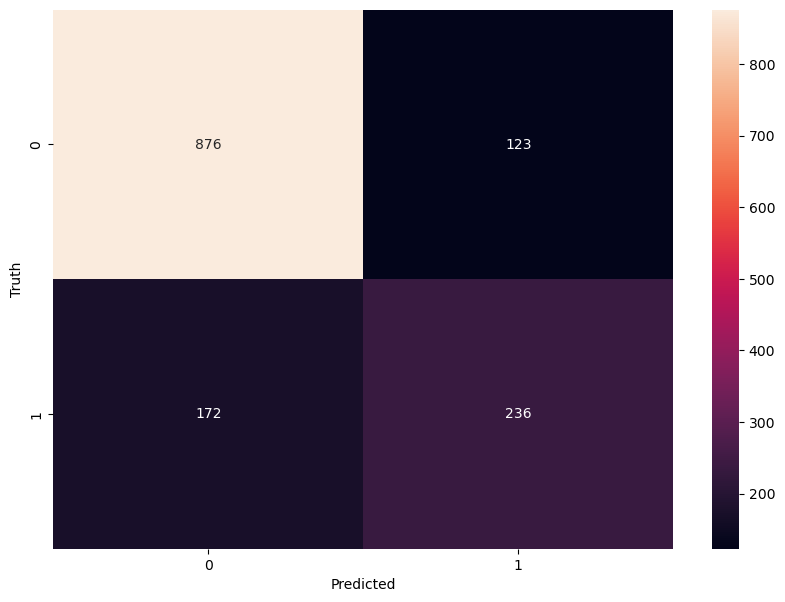

In [38]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
print("accuracy")
round((880+237)/(880+237+171+119),2)

accuracy


0.79

In [40]:
print("Precision for 0 class. i.e. Precision for customers who did not churn")
round(880/(862+171),2)


Precision for 0 class. i.e. Precision for customers who did not churn


0.85

In [41]:
print("Precision for 1 class. i.e. Precision for customers who actually churned")
round(237/(237+119),2)


Precision for 1 class. i.e. Precision for customers who actually churned


0.67

In [42]:
print("Recall for 0 class")
round (880/(880+119),2)



Recall for 0 class


0.88

In [43]:
print("Recall for 1 class")
round (237/(237+172),2)

Recall for 1 class


0.58